In [19]:
#Name:Benson Karanja 
#Project:A Housing price prediction model.
#Type:linear Regression Prediction Model[L2 REGULARIZATION]
#Date:17TH NOV 2024.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import joblib

In [21]:
df=pd.read_csv('housing_price_dataset.csv')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [22]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df.Neighborhood=lr.fit_transform(df['Neighborhood'])
df.drop(['Neighborhood'],axis='columns')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


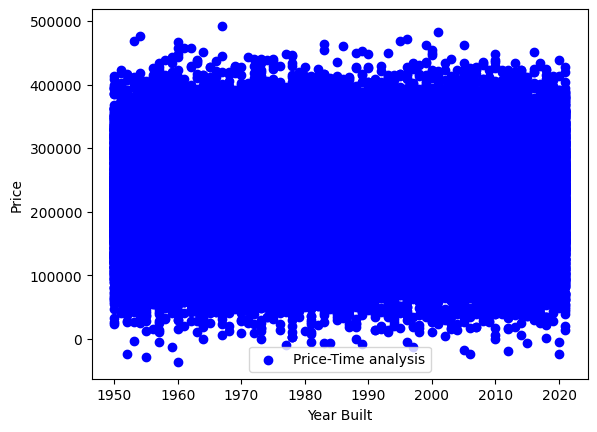

In [23]:
import matplotlib.pyplot as plt
plt.scatter(df['YearBuilt'], df['Price'], marker='o',color='blue', label='Price-Time analysis')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.legend()
plt.show()

In [24]:
df[df['Neighborhood']==1].count()

SquareFeet      16721
Bedrooms        16721
Bathrooms       16721
Neighborhood    16721
YearBuilt       16721
Price           16721
dtype: int64

In [25]:
df[df['Neighborhood']==0].count()

SquareFeet      16676
Bedrooms        16676
Bathrooms       16676
Neighborhood    16676
YearBuilt       16676
Price           16676
dtype: int64

In [26]:
df[df['Neighborhood']==2].count()

SquareFeet      16603
Bedrooms        16603
Bathrooms       16603
Neighborhood    16603
YearBuilt       16603
Price           16603
dtype: int64

In [27]:
df.nunique()

SquareFeet       2000
Bedrooms            4
Bathrooms           3
Neighborhood        3
YearBuilt          72
Price           50000
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  int64  
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.3 MB


In [29]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [30]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,0.998540,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,0.815838,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,0.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,0.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2.000000,2021.000000,492195.259972


In [31]:
x=df.drop(['Price'],axis='columns')
x.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,2126,4,1,0,1969
1,2459,3,2,0,1980
2,1860,2,1,1,1970
3,2294,2,1,2,1996
4,2130,5,2,1,2001


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [33]:
y=df.Price
y.head()

0    215355.283618
1    195014.221626
2    306891.012076
3    206786.787153
4    272436.239065
Name: Price, dtype: float64

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [35]:
from sklearn.linear_model import Ridge, Lasso
model = Ridge(alpha=10)
model.fit(x_train, y_train)


Ridge(alpha=10)

In [36]:
model.score(x_test,y_test)

0.5712615357286864

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [39]:
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [40]:
y_predi = rf.predict(x_test)
mse = mean_squared_error(y_test, y_predi)
mse

2767297836.8797226

In [41]:
rf.score(x_test,y_test)

0.5171794182166476

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [44]:
lr.score(x_test,y_test)

0.5712614134194343

In [ ]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [37]:
import joblib
joblib.dump (model,'housing_prediction_model.joblib')

['housing_prediction_model.joblib']